In [1582]:
# importação das bibliotecas

%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [1583]:
# intância do grafo Caixeiro Viajante

G = nx.Graph()

In [1761]:
# adição dos vértices e grafos 

G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')
G.add_node('E')
G.add_weighted_edges_from([('A','B', 22), ('A','C', 50), ('A','D', 48), ('A', 'E', 29)], tx_y=0, nx_y=0, txn=0, pxy=0, color='black')
G.add_weighted_edges_from([('B','A', 22), ('B','C', 30), ('B','D', 34), ('B', 'E', 32)], tx_y=0, nx_y=0, txn=0, pxy=0, color='black')
G.add_weighted_edges_from([('C','A', 50), ('C','B', 30), ('C','D', 22), ('C', 'E', 23)], tx_y=0, nx_y=0, txn=0, pxy=0, color='black')
G.add_weighted_edges_from([('D','A', 48), ('D','B', 34), ('D','C', 22), ('D', 'E', 35)], tx_y=0, nx_y=0, txn=0, pxy=0, color='black')
G.add_weighted_edges_from([('E','A', 29), ('E','B', 32), ('E','C', 23), ('E', 'D', 35)], tx_y=0, nx_y=0, txn=0, pxy=0, color='black')

/home/diego/virtual/ACO3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/diego/virtual/ACO3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/diego/virtual/ACO3.6/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/diego/virtual/ACO3.6/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.w

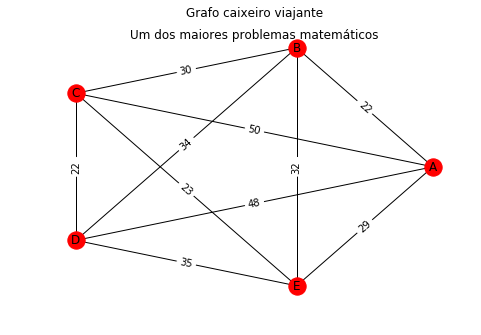

In [1652]:
# plotando grafo

pos=nx.circular_layout(G)
nx.draw(G,pos, with_labels=True)
colors = [G[u][v]['color'] for u,v in G.edges()]
#nx.draw_circular(G,node_color='r',with_labels=True, edge_labels=labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Grafo caixeiro viajante")
plt.suptitle("Um dos maiores problemas matemáticos")
plt.show()

In [1659]:
# inicialização dos dados!

def sumAllNeighborsAndTxyNxy(vertice):
    s = 0
    for vizinho in G.neighbors(vertice):
        Atx_y = float(1/G.get_edge_data(vertice, vizinho)['weight'])
        Anx_y = 0.1
        Atxn = float(Atx_y*Anx_y)
        s += Atxn
    return s

def preparingPlot():
    all_atributes, routs, distances, tx_y, nx_y, txn, pxy, ppxy = [], [], [], [], [], [], [], []

    for vertice in G.nodes():
        for vizinho in G.neighbors(vertice):
            routs.append([vertice, vizinho])
            distances.append(G.get_edge_data(vertice, vizinho)['weight'])
            tx_y.append(G.get_edge_data(vertice, vizinho)['tx_y'])
            nx_y.append(G.get_edge_data(vertice, vizinho)['nx_y'])
            txn.append(G.get_edge_data(vertice, vizinho)['txn'])
            pxy.append(G.get_edge_data(vertice, vizinho)['pxy'])
            ppxy.append(G.get_edge_data(vertice, vizinho)['pxy'] * 100)
    all_atributes.append(routs)
    all_atributes.append(distances)
    all_atributes.append(tx_y)
    all_atributes.append(nx_y)
    all_atributes.append(txn)
    all_atributes.append(pxy)
    all_atributes.append(ppxy)
    
    return all_atributes
        
    
    
for vertice in G.nodes():
    sumTxVertice = sumAllNeighborsAndTxyNxy(vertice)
    for vizinho in G.neighbors(vertice):
        Atx_y = 1/G.get_edge_data(vertice, vizinho)['weight']
        Anx_y = 0.1
        Atxn = Atx_y*Anx_y
        Apxy = Atxn/sumTxVertice
        G[vertice][vizinho]['tx_y'] = Atx_y
        G[vertice][vizinho]['nx_y'] = Anx_y
        G[vertice][vizinho]['txn'] = Atxn
        G[vertice][vizinho]['pxy'] = Apxy

In [1660]:
# tabela dos dados iniciais

pre_dados = preparingPlot()

dados = {
    '1. Rotas':pre_dados[0],
    '2. Distância':pre_dados[1],
    '3. t(xy)':pre_dados[2],
    '4. n(xy)':pre_dados[3],
    '5. t(xy)*n(xy)':pre_dados[4],
    '6. P(xy)':pre_dados[5],
    '7. P(xy) %':pre_dados[6]
}

df = pd.DataFrame(dados)
df

,1. Rotas,2. Distância,3. t(xy),4. n(xy),5. t(xy)*n(xy),6. P(xy),7. P(xy) %
0,"[A, B]",22,0.045455,0.1,0.004545,0.325957,32.595670
1,"[A, C]",50,0.020000,0.1,0.002000,0.140582,14.058159
2,"[A, D]",48,0.020833,0.1,0.002083,0.167644,16.764427
3,"[A, E]",29,0.034483,0.1,0.003448,0.250270,25.026960
4,"[B, A]",22,0.045455,0.1,0.004545,0.325957,32.595670
5,"[B, C]",30,0.033333,0.1,0.003333,0.234303,23.430265
6,"[B, D]",34,0.029412,0.1,0.002941,0.236674,23.667427
7,"[B, E]",32,0.031250,0.1,0.003125,0.226807,22.680683
8,"[C, A]",50,0.020000,0.1,0.002000,0.140582,14.058159
9,"[C, B]",30,0.033333,0.1,0.003333,0.234303,23.430265


In [1665]:
# declarando as formigas

import random

class Ant(object):
    '''
    Classe que movimenta as formigas
    '''
    def __init__(self, saida):
        self.saida = saida
        self.pontos_visitados = [saida]
        self.arestas_visitadas = []
        self.arestas_visitadas_literal = []
    
    def caminhar(self):
        self.roulette_wheel(self.saida)        
        self.pontos_visitados.append(self.saida)
        for i in range(len(self.pontos_visitados)-1):
            self.arestas_visitadas.append(G[self.pontos_visitados[i]][self.pontos_visitados[i+1]])
            self.arestas_visitadas_literal.append([self.pontos_visitados[i], self.pontos_visitados[i+1]])
    
    # método da roleta
    def roulette_wheel(self, inicio):
        if len(self.pontos_visitados) >= 5:
            return
        
        lista_com_possiveis_destinos = []
        
        for l in G.neighbors(inicio):
            if l not in self.pontos_visitados:
                lista_com_possiveis_destinos.append(l)
            
        
        sum_l = 0
        
        lista_com_pesos = []
            
        for i in lista_com_possiveis_destinos:
            lista_com_pesos.append(G.get_edge_data(inicio, i)['pxy']*100)
        
        new_key_drawn = random.choices(lista_com_possiveis_destinos, lista_com_pesos,k=1)[0]
        self.pontos_visitados.append(new_key_drawn)
        self.roulette_wheel(new_key_drawn)

    def sum_route(self):
        distancia_caminho = 0
        for i in range(len(self.pontos_visitados)-1):
            distancia_caminho += G.get_edge_data(self.pontos_visitados[i], self.pontos_visitados[i+1])['weight']
        return distancia_caminho


# criação das formigas
f = list()

for i in range(5):
    f.append(Ant(G.nodes()[i]))
    
print("Dados inicializados (As formigas formam rotas aleatórias):\n")
for i in range(5):
    f[i].caminhar()    
    print("A formiga {} fez o caminho {} com o custo {}".format(i+1, f[i].pontos_visitados, f[i].sum_route()))

    #print(f[i].arestas_visitadas_literal)


Dados inicializados (As formigas formam rotas aleatórias):

A formiga 1 fez o caminho ['A', 'B', 'D', 'E', 'C', 'A'] com o custo 164
A formiga 2 fez o caminho ['B', 'D', 'A', 'E', 'C', 'B'] com o custo 164
A formiga 3 fez o caminho ['C', 'E', 'A', 'B', 'D', 'C'] com o custo 130
A formiga 4 fez o caminho ['D', 'A', 'C', 'E', 'B', 'D'] com o custo 187
A formiga 5 fez o caminho ['E', 'A', 'C', 'D', 'B', 'E'] com o custo 167


In [1666]:
# atualizando as rotas

def sum_pre(vertice):
    sum_all = 0
    for edge in G.neighbors(vertice):
        sum_all += G.get_edge_data(vertice, edge)['txn']
    return sum_all
    

def updateRoutes():
    for vertice in G.nodes():
        sum_pre(vertice)
        sumTxVertice = sum_pre(vertice)
        for vizinho in G.neighbors(vertice):
            Anx_y = G.get_edge_data(vertice, vizinho)['nx_y']
            Atx_y = G.get_edge_data(vertice, vizinho)['tx_y']
            Atxn = Atx_y*Anx_y
            Apxy = Atxn/sumTxVertice
            G[vertice][vizinho]['tx_y'] = Atx_y
            G[vertice][vizinho]['txn'] = Atxn
            G[vertice][vizinho]['pxy'] = Apxy

In [1667]:
def iterar():
    f = list()

    for i in range(5):
        f.append(Ant(G.nodes()[i]))

    for i in range(5):
        f[i].caminhar()
        print("A formiga {} fez o caminho {} com o custo {}".format(i+1, f[i].pontos_visitados, f[i].sum_route()))

    
    # atualização de feromônio

    coeficiente_feromonio = 0.001 # coeficiente eficaz para o caso

    for edge in G.edges():
        total_feromonio = coeficiente_feromonio
        for formiga in f:
            if G[edge[0]][edge[1]] in formiga.arestas_visitadas:
                total_feromonio += float(10/formiga.sum_route())
        G[edge[0]][edge[1]]['nx_y'] = total_feromonio
   
    updateRoutes()

    

In [1668]:
# 1ª iteração
iterar()
pre_dados = preparingPlot()

dados = {
    '1. Rotas':pre_dados[0],
    '2. Distância':pre_dados[1],
    '3. t(xy)':pre_dados[2],
    '4. n(xy)':pre_dados[3],
    '5. t(xy)*n(xy)':pre_dados[4],
    '6. P(xy)':pre_dados[5],
    '7. P(xy) %':pre_dados[6]
}

df = pd.DataFrame(dados)
df

A formiga 1 fez o caminho ['A', 'B', 'C', 'E', 'D', 'A'] com o custo 158
A formiga 2 fez o caminho ['B', 'A', 'C', 'D', 'E', 'B'] com o custo 161
A formiga 3 fez o caminho ['C', 'D', 'E', 'B', 'A', 'C'] com o custo 161
A formiga 4 fez o caminho ['D', 'E', 'C', 'B', 'A', 'D'] com o custo 158
A formiga 5 fez o caminho ['E', 'A', 'C', 'D', 'B', 'E'] com o custo 167


,1. Rotas,2. Distância,3. t(xy),4. n(xy),5. t(xy)*n(xy),6. P(xy),7. P(xy) %
0,"[A, B]",22,0.045455,0.251806,0.011446,0.549081,54.908106
1,"[A, C]",50,0.020000,0.185104,0.003702,0.219733,21.973260
2,"[A, D]",48,0.020833,0.127582,0.002658,0.169087,16.908692
3,"[A, E]",29,0.034483,0.060880,0.002099,0.101784,10.178355
4,"[B, A]",22,0.045455,0.251806,0.011446,0.549081,54.908106
5,"[B, C]",30,0.033333,0.127582,0.004253,0.252417,25.241675
6,"[B, D]",34,0.029412,0.060880,0.001791,0.113909,11.390908
7,"[B, E]",32,0.031250,0.185104,0.005784,0.280456,28.045597
8,"[C, A]",50,0.020000,0.185104,0.003702,0.219733,21.973260
9,"[C, B]",30,0.033333,0.127582,0.004253,0.252417,25.241675


In [1669]:
# 2ª iteração
iterar()
pre_dados = preparingPlot()

dados = {
    '1. Rotas':pre_dados[0],
    '2. Distância':pre_dados[1],
    '3. t(xy)':pre_dados[2],
    '4. n(xy)':pre_dados[3],
    '5. t(xy)*n(xy)':pre_dados[4],
    '6. P(xy)':pre_dados[5],
    '7. P(xy) %':pre_dados[6]
}

df = pd.DataFrame(dados)
df

A formiga 1 fez o caminho ['A', 'B', 'D', 'C', 'E', 'A'] com o custo 130
A formiga 2 fez o caminho ['B', 'C', 'D', 'E', 'A', 'B'] com o custo 138
A formiga 3 fez o caminho ['C', 'D', 'E', 'B', 'A', 'C'] com o custo 161
A formiga 4 fez o caminho ['D', 'A', 'C', 'B', 'E', 'D'] com o custo 195
A formiga 5 fez o caminho ['E', 'A', 'B', 'C', 'D', 'E'] com o custo 138


,1. Rotas,2. Distância,3. t(xy),4. n(xy),5. t(xy)*n(xy),6. P(xy),7. P(xy) %
0,"[A, B]",22,0.045455,0.284962,0.012953,0.522699,52.269923
1,"[A, C]",50,0.020000,0.114394,0.002288,0.100247,10.024701
2,"[A, D]",48,0.020833,0.052282,0.001089,0.046293,4.629348
3,"[A, E]",29,0.034483,0.222851,0.007685,0.348402,34.840160
4,"[B, A]",22,0.045455,0.284962,0.012953,0.522699,52.269923
5,"[B, C]",30,0.033333,0.197210,0.006574,0.288035,28.803517
6,"[B, D]",34,0.029412,0.077923,0.002292,0.097408,9.740822
7,"[B, E]",32,0.031250,0.114394,0.003575,0.162075,16.207537
8,"[C, A]",50,0.020000,0.114394,0.002288,0.100247,10.024701
9,"[C, B]",30,0.033333,0.197210,0.006574,0.288035,28.803517


In [1670]:
# 3ª iteração
iterar()
pre_dados = preparingPlot()

dados = {
    '1. Rotas':pre_dados[0],
    '2. Distância':pre_dados[1],
    '3. t(xy)':pre_dados[2],
    '4. n(xy)':pre_dados[3],
    '5. t(xy)*n(xy)':pre_dados[4],
    '6. P(xy)':pre_dados[5],
    '7. P(xy) %':pre_dados[6]
}

df = pd.DataFrame(dados)
df

A formiga 1 fez o caminho ['A', 'B', 'C', 'D', 'E', 'A'] com o custo 138
A formiga 2 fez o caminho ['B', 'A', 'E', 'D', 'C', 'B'] com o custo 138
A formiga 3 fez o caminho ['C', 'B', 'D', 'E', 'A', 'C'] com o custo 178
A formiga 4 fez o caminho ['D', 'A', 'C', 'B', 'E', 'D'] com o custo 195
A formiga 5 fez o caminho ['E', 'D', 'C', 'A', 'B', 'E'] com o custo 161


,1. Rotas,2. Distância,3. t(xy),4. n(xy),5. t(xy)*n(xy),6. P(xy),7. P(xy) %
0,"[A, B]",22,0.045455,0.208039,0.009456,0.431862,43.186212
1,"[A, C]",50,0.020000,0.170574,0.003411,0.120980,12.098029
2,"[A, D]",48,0.020833,0.052282,0.001089,0.055469,5.546866
3,"[A, E]",29,0.034483,0.202107,0.006969,0.355539,35.553926
4,"[B, A]",22,0.045455,0.208039,0.009456,0.431862,43.186212
5,"[B, C]",30,0.033333,0.253389,0.008446,0.299530,29.952968
6,"[B, D]",34,0.029412,0.057180,0.001682,0.085645,8.564457
7,"[B, E]",32,0.031250,0.114394,0.003575,0.182371,18.237120
8,"[C, A]",50,0.020000,0.170574,0.003411,0.120980,12.098029
9,"[C, B]",30,0.033333,0.253389,0.008446,0.299530,29.952968


In [1733]:
# n iterações = 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15
#               16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26
#               27 (Convegiu), 
iterar()
pre_dados = preparingPlot()

dados = {
    '1. Rotas':pre_dados[0],
    '2. Distância':pre_dados[1],
    '3. t(xy)':pre_dados[2],
    '4. n(xy)':pre_dados[3],
    '5. t(xy)*n(xy)':pre_dados[4],
    '6. P(xy)':pre_dados[5],
    '7. P(xy) %':pre_dados[6]
}

df = pd.DataFrame(dados)
df

A formiga 1 fez o caminho ['A', 'E', 'C', 'D', 'B', 'A'] com o custo 130
A formiga 2 fez o caminho ['B', 'D', 'C', 'E', 'A', 'B'] com o custo 130
A formiga 3 fez o caminho ['C', 'D', 'B', 'A', 'E', 'C'] com o custo 130
A formiga 4 fez o caminho ['D', 'B', 'A', 'E', 'C', 'D'] com o custo 130
A formiga 5 fez o caminho ['E', 'A', 'B', 'D', 'C', 'E'] com o custo 130


,1. Rotas,2. Distância,3. t(xy),4. n(xy),5. t(xy)*n(xy),6. P(xy),7. P(xy) %
0,"[A, B]",22,0.045455,0.385615,0.017528,0.605788,60.578767
1,"[A, C]",50,0.020000,0.001000,0.000020,0.000582,0.058229
2,"[A, D]",48,0.020833,0.001000,0.000021,0.000720,0.072040
3,"[A, E]",29,0.034483,0.385615,0.013297,0.441429,44.142930
4,"[B, A]",22,0.045455,0.385615,0.017528,0.605788,60.578767
5,"[B, C]",30,0.033333,0.001000,0.000033,0.000970,0.097048
6,"[B, D]",34,0.029412,0.385615,0.011342,0.392186,39.218599
7,"[B, E]",32,0.031250,0.001000,0.000031,0.001037,0.103742
8,"[C, A]",50,0.020000,0.001000,0.000020,0.000582,0.058229
9,"[C, B]",30,0.033333,0.001000,0.000033,0.000970,0.097048


/home/diego/virtual/ACO3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/diego/virtual/ACO3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/diego/virtual/ACO3.6/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/diego/virtual/ACO3.6/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.w

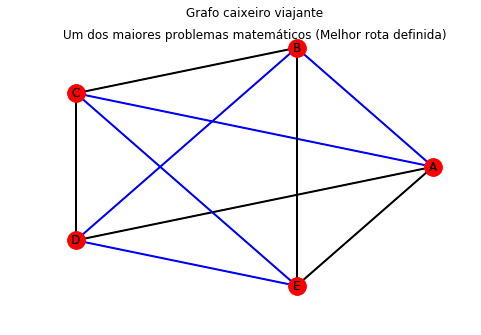

In [1771]:
# Foi descoberta a melhor rota com 27 iterações

# plotando grafo

pos=nx.circular_layout(G)
nx.draw(G,pos, with_labels=True)
for g in f[0].arestas_visitadas:
    g['color'] = 'b'
colors = [G[u][v]['color'] for u,v in G.edges()]
#nx.draw_circular(G,node_color='r',with_labels=True, edge_labels=labels)
nx.draw_networkx(G, pos, edge_labels=labels, edge_color=colors, width=2)
plt.title("Grafo caixeiro viajante")
plt.suptitle("Um dos maiores problemas matemáticos (Melhor rota definida)")
plt.show()